In [7]:
import pandas as pd

In [8]:
df=pd.read_csv("D:\\DATA SCIENCE\\CHURN PROJ\\TELCO_CLEANED.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
Encod_Label = ['gender', 'Partner', 'Dependents', 'PhoneService','Churn']
Num_label = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Encod_OneHot = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
df['TotalCharges'].dtype

dtype('float64')

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

for col in Encod_Label:
    df[col] = le.fit_transform(df[col])

In [14]:
for col in Encod_OneHot:
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(columns=[col], axis=1, inplace=False)

In [15]:
print(df.dtypes)

gender                                     int32
SeniorCitizen                              int64
Partner                                    int32
Dependents                                 int32
tenure                                     int64
PhoneService                               int32
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int32
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes     

In [16]:
# Misal df adalah dataframe kamu
numeric_features = df.select_dtypes(include=['int64', 'int32', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object', 'bool']).columns.tolist()


In [17]:
df.rename(columns={'Churn_x':'Churn'}, inplace=True)

In [18]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [19]:
from pycaret.classification import *

# Cek target ada
assert 'Churn' in df.columns, "Kolom target 'Churn' tidak ada di dataframe!"

# Identifikasi fitur numerik/kategorikal
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = [col for col in df.columns if col not in numeric_features + ['Churn','customer ID']]

# Setup PyCaret
exp_clf = setup(
    data=df,
    target='Churn',
    session_id=123,
    numeric_features=numeric_features,
    categorical_features=categorical_features,
    fold_shuffle=True
)


,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 31)"
4,Transformed data shape,"(7043, 31)"
5,Transformed train set shape,"(4930, 31)"
6,Transformed test set shape,"(2113, 31)"
7,Numeric features,3
8,Categorical features,27
9,Preprocess,True


In [ ]:
# PyCaret
from pycaret.classification import *

# Sklearn metrics
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss

# Misal setup sudah jalan sebelumnya
# Top 3 model berdasarkan AUC
top3_auc = compare_models(n_select=3, sort='AUC')
print("Top 3 model berdasarkan AUC:")
for i, model in enumerate(top3_auc, 1):
    print(f"{i}. {model}") 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8022,0.8461,0.5260,0.6631,0.5845,0.4573,0.4639,0.3080
ada,Ada Boost Classifier,0.7992,0.8457,0.5291,0.6524,0.5821,0.4522,0.4578,0.2310
lr,Logistic Regression,0.8008,0.8449,0.5420,0.6526,0.5899,0.4602,0.4651,1.0160
catboost,CatBoost Classifier,0.7988,0.8397,0.5222,0.6531,0.5789,0.4491,0.4548,1.8780
qda,Quadratic Discriminant Analysis,0.7110,0.8368,0.8242,0.4750,0.6023,0.4004,0.4382,0.1860
ridge,Ridge Classifier,0.8014,0.8364,0.5222,0.6632,0.5818,0.4544,0.4615,0.1870
lda,Linear Discriminant Analysis,0.7959,0.8364,0.5497,0.6368,0.5879,0.4536,0.4572,0.1860
lightgbm,Light Gradient Boosting Machine,0.7933,0.8350,0.5321,0.6336,0.5769,0.4418,0.4457,0.3090
xgboost,Extreme Gradient Boosting,0.7901,0.8251,0.5298,0.6249,0.5716,0.4342,0.4379,0.2940
rf,Random Forest Classifier,0.7929,0.8237,0.4901,0.6451,0.5559,0.4244,0.4318,0.2930


Top 3 model berdasarkan AUC:
1. GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
2. AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)
3. LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2'

Predicting Churn

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, log_loss, f1_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [26]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [27]:
# === 1. Split Data ===
# Asumsi X dan y sudah ada
X_train_full, X_outsample, y_train_full, y_outsample = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.222, random_state=42, stratify=y_train_full)
# (0.222 dari 90% ≈ 20% total)

print(f"Train: {len(X_train)}, Test: {len(X_test)}, Outsample: {len(X_outsample)}")

Train: 4930, Test: 1408, Outsample: 705


In [28]:
# === 2. Definisikan Model & Parameter Space untuk Random Search ===
gboost = GradientBoostingClassifier(random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}


In [29]:
# === 3. Randomized Search CV ===
random_search = RandomizedSearchCV(
    estimator=gboost,
    param_distributions=param_dist,
    n_iter=30,
    cv=10,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print("\n=== Best Hyperparameters ===")
print(random_search.best_params_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits

=== Best Hyperparameters ===
{'subsample': 0.9, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 4, 'learning_rate': 0.01}


In [30]:
# === 4. Evaluasi Performansi ===
def evaluate_model(model, X, y, label="Dataset"):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:,1]
    acc = accuracy_score(y, y_pred)
    auc = roc_auc_score(y, y_prob)
    ll = log_loss(y, y_prob)
    f1 = f1_score(y, y_pred)
    print(f"\n[{label}] Accuracy: {acc:.3f} | AUC: {auc:.3f} | LogLoss: {ll:.3f} | F1: {f1:.3f}")
    return acc, auc, ll, f1

evaluate_model(best_model, X_train, y_train, "Train")
evaluate_model(best_model, X_test, y_test, "Test")
evaluate_model(best_model, X_outsample, y_outsample, "Outsample")


[Train] Accuracy: 0.820 | AUC: 0.872 | LogLoss: 0.388 | F1: 0.613

[Test] Accuracy: 0.807 | AUC: 0.851 | LogLoss: 0.413 | F1: 0.589

[Outsample] Accuracy: 0.811 | AUC: 0.858 | LogLoss: 0.403 | F1: 0.578


(0.8113475177304964,
 0.8584694319988438,
 0.40287340165851665,
 0.5777777777777777)

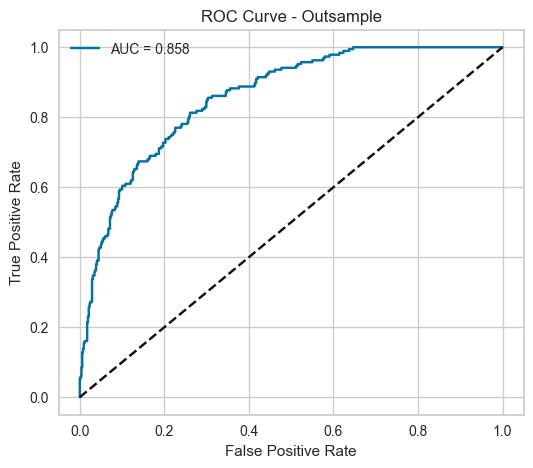

In [31]:
# === 5. Plot ROC Curve (Outsample) ===
y_prob_out = best_model.predict_proba(X_outsample)[:,1]
fpr, tpr, _ = roc_curve(y_outsample, y_prob_out)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_outsample, y_prob_out):.3f}')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve - Outsample')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

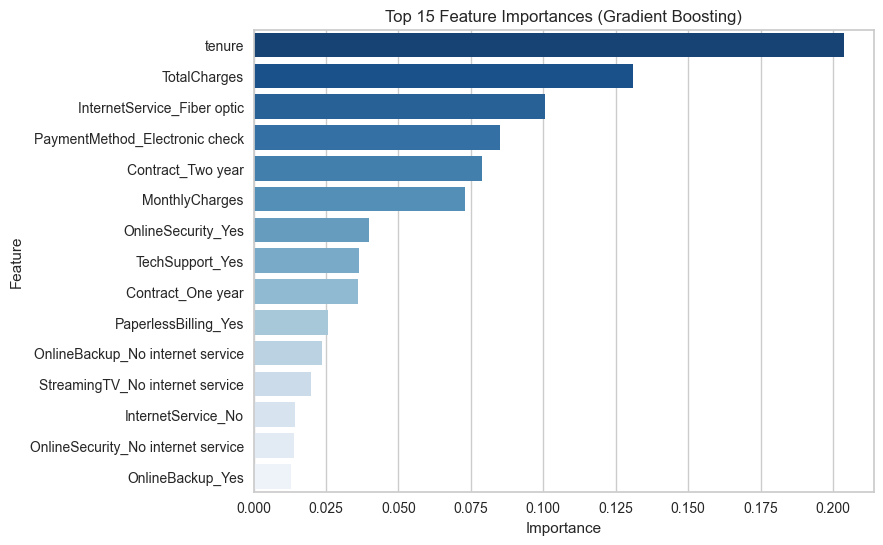

In [32]:
# === 6. Feature Importance ===
importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=importances[:15], y=importances.index[:15], palette='Blues_r')
plt.title("Top 15 Feature Importances (Gradient Boosting)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
# Identifikasi High Risk Segment (top 20% probabilitas)
def identify_risk_segment(probs, quantile=0.8):
    threshold = np.quantile(probs, quantile)
    return np.where(probs >= threshold, 'High Risk', 'Low Risk')

train_risk = identify_risk_segment(y_train_prob)
test_risk = identify_risk_segment(y_test_prob)
outsample_risk = identify_risk_segment(y_out_prob)

# attach segment ke dataframe
df_train = X_train.copy()
df_train['churn'] = y_train
df_train['risk_segment'] = train_risk

           gender  SeniorCitizen     Partner  Dependents      tenure  \
count  986.000000     986.000000  986.000000  986.000000  986.000000   
mean     0.472617       0.332657    0.291075    0.098377   10.493915   
std      0.499503       0.471404    0.454489    0.297975   10.966884   
min      0.000000       0.000000    0.000000    0.000000    1.000000   
25%      0.000000       0.000000    0.000000    0.000000    2.000000   
50%      0.000000       0.000000    0.000000    0.000000    7.000000   
75%      1.000000       1.000000    1.000000    0.000000   15.000000   
max      1.000000       1.000000    1.000000    1.000000   56.000000   

       PhoneService  MonthlyCharges  TotalCharges       churn  
count    986.000000      986.000000    986.000000  986.000000  
mean       0.926978       80.981136    939.034483    0.681542  
std        0.260305       17.492605   1078.913414    0.466115  
min        0.000000       23.450000     23.450000    0.000000  
25%        1.000000       74.20

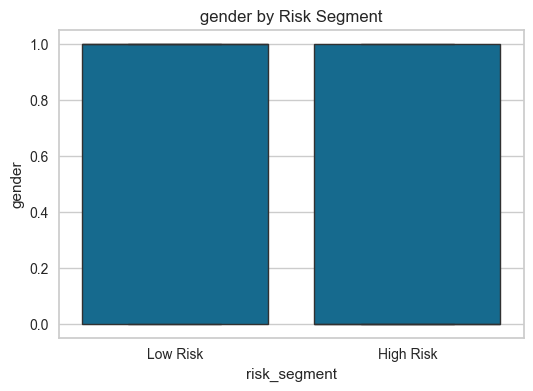

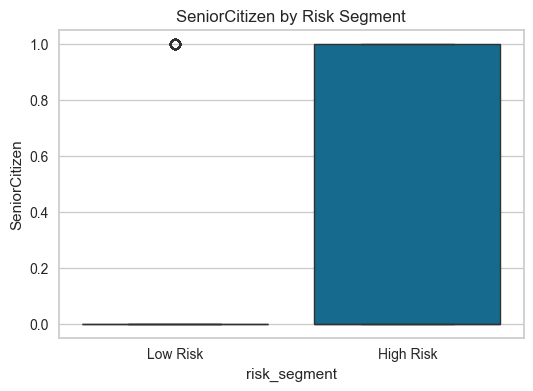

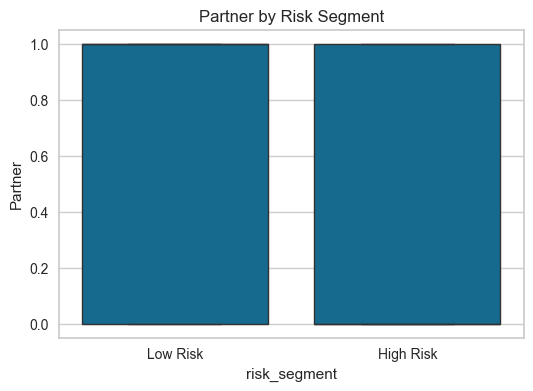

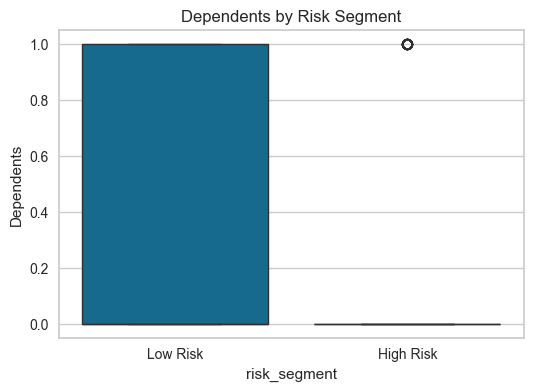

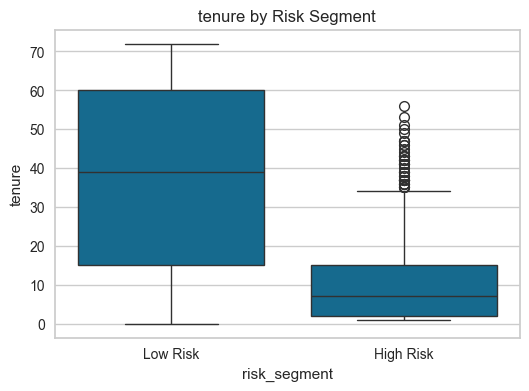

In [36]:
# 7️⃣ Profiling High Risk Segment
high_risk_profile = df_train[df_train['risk_segment']=='High Risk'].describe()
print(high_risk_profile)

# 8️⃣ Visualisasi Distribusi Fitur High Risk vs Low Risk
for col in X_train.columns[:5]:  # contoh 5 fitur pertama
    plt.figure(figsize=(6,4))
    sns.boxplot(x='risk_segment', y=col, data=df_train)
    plt.title(f'{col} by Risk Segment')
    plt.show()

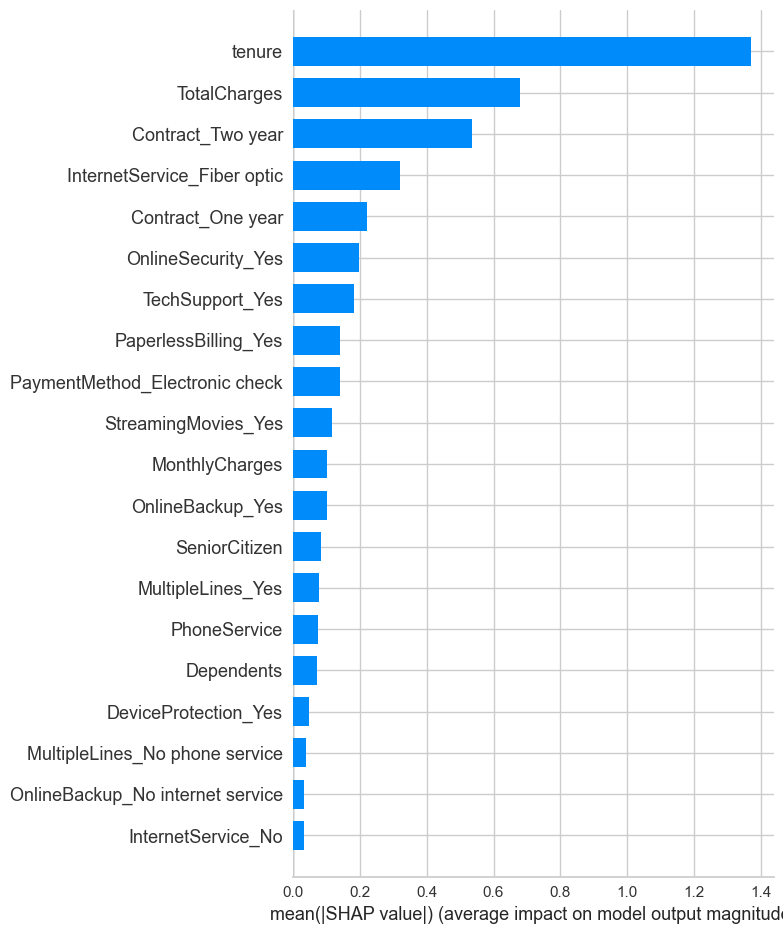

In [42]:
import shap
import numpy as np

# Feature Importance dengan SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

# Summary plot (bar)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Dependence plot tanpa interaksi
important_feature = X_train.columns[np.argmax(np.abs(shap_values.values).mean(0))]

